```Problem 3: Collect your own dataset which consists at least two features and one target variable. Build a linear regression model to predict the target variable. Split your dataset into training set (80 %) and testing set (20 %).```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Source of data : https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

Original Source : **Mathematical Algorithms for Linear Regression Book**

**Data from various public electricity supply authorities was collected.**

- Captial Cost : cost on constructing, maintaining power plants. (more money on investing => better equipments => more electricity)

- Labor Cost : cost on works. (more workers => more electricity)

- Energy cost : cost on buying raw materials to produce electricity. (more materials => more electricity)

- Electricity Output (million kilowatts) : how much electricity is produced.

## 1. Import Data

In [ ]:
df = pd.read_fwf('x12.txt', names=['capital_cost', 'labor_cost', 'energy_cost', 'electricity_output(mkw)'])

In [ ]:
df['electricity_output(mkw)'] = df['electricity_output(mkw)'].str.replace(",",".").astype('float64')
df.head()

,capital_cost,labor_cost,energy_cost,electricity_output(mkw)
0,98.288,0.386,13.219,1.270
1,255.068,1.179,49.145,4.597
2,208.904,0.532,18.005,1.985
3,528.864,1.836,75.639,9.897
4,307.419,1.136,52.234,5.907


In [ ]:
df.shape

(16, 4)

In [ ]:
X = df.drop(columns=['electricity_output(mkw)']).to_numpy()
y = df['electricity_output(mkw)'].to_numpy()

## 2. Scale data

$X_{scale} = \dfrac{X - \bar{X}}{X_{max} - X_{min}}$

In [ ]:
def scale(x):
  x = (x - x.mean())/(max(x) - min(x))
  return x

In [ ]:
X

array([[9.82880e+01, 3.86000e-01, 1.32190e+01],
       [2.55068e+02, 1.17900e+00, 4.91450e+01],
       [2.08904e+02, 5.32000e-01, 1.80050e+01],
       [5.28864e+02, 1.83600e+00, 7.56390e+01],
       [3.07419e+02, 1.13600e+00, 5.22340e+01],
       [1.38283e+02, 1.08500e+00, 9.02700e+00],
       [4.18883e+02, 2.39000e+00, 4.16760e+01],
       [2.47439e+02, 1.35600e+00, 3.12440e+01],
       [1.94780e+01, 1.15000e-01, 1.73900e+00],
       [5.37540e+02, 2.59100e+00, 1.04584e+02],
       [6.05507e+02, 2.78900e+00, 8.22960e+01],
       [1.74765e+02, 9.33000e-01, 2.19900e+01],
       [9.46766e+02, 4.00400e+00, 1.25351e+02],
       [2.96490e+02, 1.51300e+00, 4.32320e+01],
       [6.45690e+02, 2.54000e+00, 7.55810e+01],
       [2.88975e+02, 1.41600e+00, 4.20370e+01]])

In [ ]:
X1 = scale(X[:, 0]).reshape(-1,1)
X2 = scale(X[:, 1]).reshape(-1,1)
X3 = scale(X[:, 2]).reshape(-1,1)

X_scale = np.concatenate((X1,X2,X3), axis=1)

## 3. Split data into train and test set

In [ ]:
X.shape

(16, 3)

In [ ]:
int(0.8*16)

12

In [ ]:
ratio = 0.8
rows = int(ratio * X.shape[0])
np.random.seed(42)
np.random.shuffle(X_scale)
X_train, X_test = X_scale[:rows], X_scale[rows:]

In [ ]:
ratio = 0.8
rows = int(ratio * y.shape[0])
np.random.seed(42)
np.random.shuffle(y)
y_train, y_test = y[:rows], y[rows:]

In [ ]:
X_train.shape, y_train.shape

((12, 3), (12,))

## 4. Building a model

model : $y_{predict} = \vec{w} \cdot \vec{X} + b$

In [ ]:
def predict(X, w, b):
    y = np.dot(X, w) + b
    return y

Cost Function : $J(w,b) = \dfrac{1}{2m} \sum\limits_{i=1}^m (y_{pred} - y)^2$

In [ ]:
def cost_func(X, y, w, b):
    m = X.shape[0]
    error = predict(X, w, b) - y
    cost = np.sum(error**2) / (2 * m)
    return cost

$\dfrac{\partial{J}}{\partial{w_j}} = \dfrac{1}{m} \sum\limits_{i=1}^m (y_{pred}^{(i)} - y^{(i)})w_{j}$

$\dfrac{\partial{J}}{\partial{b}} = \dfrac{1}{m}\sum\limits_{i=1}^m (y_{pred}^{(i)} - y^{(i)})$

In [ ]:
def grad(X, y, w, b):
    m, n = X.shape

    dw = np.zeros(n)
    db = 0

    for i in range(m):
        error = predict(X[i], w, b) - y[i]
        dw += error * X[i]
        db += error


    dw /= m
    db /= m

    return dw, db

In [ ]:
lr = 0.1
w = np.zeros(X_train.shape[1])
b = 0
epochs = 10001
cost = []

for i in range(epochs):
    dw, db = grad(X_train, y_train, w, b)

    w -= lr * dw
    b -= lr * db

    cost_val = cost_func(X_train, y_train, w, b)
    cost.append(cost_val)

    if i % 500 == 0:  # Print cost every 1000 iterations
        print(f'Iteration: {i}, Cost: {cost_val}')

print(f'\nFinal weights: {w}')
print(f'Final bias: {b}')
print(f'Final cost: {cost_val}')

Iteration: 0, Cost: 9.176214323124912
Iteration: 500, Cost: 0.17764079199829286
Iteration: 1000, Cost: 0.14550933088671206
Iteration: 1500, Cost: 0.12475014096742454
Iteration: 2000, Cost: 0.11131343217703214
Iteration: 2500, Cost: 0.10261416827706131
Iteration: 3000, Cost: 0.09698025679169564
Iteration: 3500, Cost: 0.09333007041762753
Iteration: 4000, Cost: 0.09096388737992585
Iteration: 4500, Cost: 0.08942900574404161
Iteration: 5000, Cost: 0.08843250492862714
Iteration: 5500, Cost: 0.08778482234151586
Iteration: 6000, Cost: 0.08736325942585575
Iteration: 6500, Cost: 0.08708837703118776
Iteration: 7000, Cost: 0.0869087270703886
Iteration: 7500, Cost: 0.08679097585117217
Iteration: 8000, Cost: 0.08671351468020894
Iteration: 8500, Cost: 0.08666232606953844
Iteration: 9000, Cost: 0.08662830895119383
Iteration: 9500, Cost: 0.08660554768518797
Iteration: 10000, Cost: 0.0865901916256493

Final weights: [ 0.29176563 -0.01792116 10.98210734]
Final bias: 4.757975981800635
Final cost: 0.086590

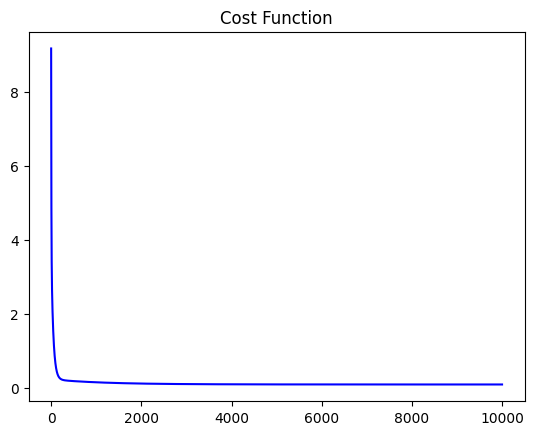

In [ ]:
plt.plot(range(epochs), cost, color= 'b')
plt.title('Cost Function')
plt.show()

In [ ]:
yhead = predict(X_train, w, b)

In [ ]:
diff = pd.DataFrame({
    'Actual' : y_train,
    'Predict' : yhead,
    'difference' : abs(y_train - yhead)
})

diff

,Actual,Predict,difference
0,1.270,1.486544,0.216544
1,4.597,4.724006,0.127006
2,1.832,1.123475,0.708525
3,7.037,7.189305,0.152305
4,4.477,4.210169,0.266831
5,2.239,2.287331,0.048331
6,0.125,0.443073,0.318073
7,9.685,9.731766,0.046766
8,1.985,1.945880,0.039120
9,3.507,4.102084,0.595084


## + **R2 Formula**

$R^2 = 1 - \dfrac{SSR}{SST}$

where $SSR = \sum\limits_{i=1}^m (y_i - y_{pred_i})^2$ and $SST = \sum\limits_{i=1}^m (y_i - \bar{y})^2$

In [ ]:
def r2_score(y_train, y_pred):
  SSR = np.sum((y_train - y_pred)**2)
  SST = np.sum((y_train - y_train.mean())**2)
  r2 = 1 - SSR/SST
  return r2

In [ ]:
r2 = r2_score(y_train, yhead)
print(f' R2 Score : {r2}')

 R2 Score : 0.974465393068136


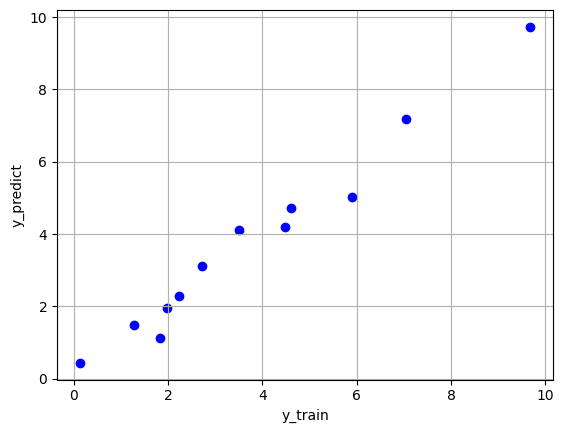

In [ ]:
plt.scatter(y_train, yhead, color = 'b')
plt.grid()
plt.xlabel("y_train")
plt.ylabel("y_predict")
plt.show()

In [ ]:
y_predict = predict(X_test, w, b )
for i in range(len(y_test)):

    print(f'Actual value : {y_test[i]} VS Predicted Value : {y_predict[i]}')

Actual value : 8.727 VS Predicted Value : 7.772097404052868
Actual value : 10.077 VS Predicted Value : 11.699025119799021
Actual value : 9.897 VS Predicted Value : 7.160943374613607
Actual value : 4.865 VS Predicted Value : 4.106398021576683


# 5. Using Scikit-learn Module

In [ ]:
df = pd.read_fwf('x12.txt', names=['capital_cost', 'labor_cost', 'energy_cost', 'electricity_output(mkw)'])
df['electricity_output(mkw)'] = df['electricity_output(mkw)'].str.replace(",",".").astype('float64')
X = df.drop(columns=['electricity_output(mkw)']).to_numpy()
y = df['electricity_output(mkw)'].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_head = model.predict(X_train)

r2 = r2_score(y_train, y_head)
mse = mean_squared_error(y_train, y_head)
print(f'r2 score : {r2}, mse : {mse}')

r2 score : 0.9150399356790218, mse : 0.9423300853427478
